In [111]:
#loading the libraries required
import pandas as pd
import numpy as np
import os
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform
import numpy as np
#from fancyimpute import KNN   
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [91]:
#setting the working directory
os.chdir("C:/Users/Nitish Rohilla/Desktop/other/Employee Absentism")

In [92]:
#Loading the data into the environment
dt=pd.read_excel("Absenteeism_at_work_Project.xls")

# Now Analysing the Data Exploratorily

In [93]:
dt.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [94]:
dt.columns


Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [114]:
#we can see that some of reason of absence variable contains zero values, we are putting them equal to category 25(i.e. unjustified absence).
dt.loc[dt['Reason for absence']==0,'Reason for absence'] = 25

In [96]:
dt.shape

(740, 21)

In [97]:
dt.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [98]:
#lookin at the bottom of mothn.of.absence variable contains zero 
#imputing values using the all observation present in same variable, in relation with season
#imputing months that might fall in relation with season
dt['Month of absence'].iloc[739] = 5
dt['Month of absence'].iloc[738] = 3
dt['Month of absence'].iloc[737] = 7

In [99]:
vars_cont=[ 'Distance from Residence to Work','Service time','Age','Work load Average/day ','Transportation expense','Hit target','Weight','Height','Body mass index','Absenteeism time in hours']
vars_categorical=['ID','Reason for absence','Month of absence','Day of the week','Seasons','Disciplinary failure','Education','Social drinker','Social smoker','Pet','Son']

In [75]:
dt

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,25.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,83.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
6,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,239554.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,239554.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


# Performing Missing Value Analysis

In [100]:
#At first we are cratin a dataframe to analyse missing percentage
missed_val = pd.DataFrame(dt.isnull().sum())

#reseting the index of the data frame
missed_val = missed_val.reset_index()

#renaming  the variable
missed_val = missed_val.rename(columns = {'index': 'Variables', 0: 'Missed_val_percentage'})

#calculating missed value percentage
missed_val['Missed_val_percentage'] = (missed_val['Missed_val_percentage']/len(dt))*100

#descending order
missed_val = missed_val.sort_values('Missed_val_percentage', ascending = False).reset_index(drop = True)


In [50]:
missed_val

,Variables,Missed_val_percentage
0,2,100.000000
1,Body mass index,3.958944
2,Height,1.906158
3,Education,1.466276
4,Work load Average/day,1.173021
5,Son,0.879765
6,Transportation expense,0.879765
7,Hit target,0.879765
8,Disciplinary failure,0.733138
9,Social smoker,0.586510


In [78]:
#*******************************selecting the best  suited method for imputaion************************
#----Manually testing each of them---------
#Creating missing value
#dt['Weight'].loc[3]= np.nan
#actual Value = 68
#mean=79.07
#median=83
#KNN=71.7 (closest so, this method suits the best)

In [74]:
#Impute with mean
#dt['Weight'] = dt['Weight'].fillna(dt['Weight'].mean())

#Impute with median
#dt['Weight'] = dt['Weight'].fillna(dt['Weight'].median())

In [106]:
#assigning the levels to the categories
lis = []
for i in range(0, dt.shape[1]):
    #print(i)
    if(dt.iloc[:,i].dtypes == 'object'):
        dt.iloc[:,i] = pd.Categorical(dt.iloc[:,i])
        #print(dt[[i]])
        dt.iloc[:,i] = dt.iloc[:,i].cat.codes 
        dt.iloc[:,i] = dt.iloc[:,i].astype('object')
        
        lis.append(dt.columns[i])
        

In [77]:
for i in range(0, dt.shape[1]):
    dt.iloc[:,i] = dt.iloc[:,i].replace(-1, np.nan) 

In [ ]:
#applying KNN imputation algorithm on the dataset
dt = pd.DataFrame(KNN(k = 3).complete(dt), columns = dt.columns)

In [107]:
#Converting the variables into proper datatypes
for i in lis:
    dt.loc[:,i] = dt.loc[:,i].round()
    dt.loc[:,i] = dt.loc[:,i].astype('object')

In [102]:
# checking for any missing value in dataframe
dt.isnull().sum().sum()

0

# Performing Outlier Analysis

Text(0, 0.5, 'respective Values')

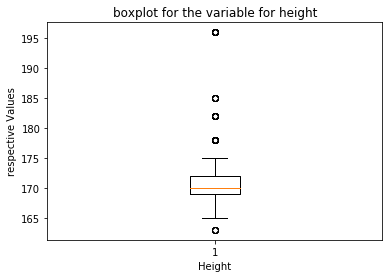

In [103]:
plt.boxplot(tt['Height'])
plt.xlabel("Height")
plt.title("boxplot for the variable for height")
plt.ylabel('respective Values')

Text(0, 0.5, 'respective Values')

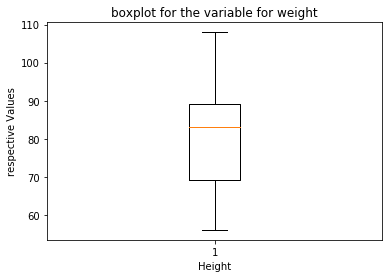

In [104]:
plt.boxplot(tt['Weight'])
plt.xlabel("Height")
plt.title("boxplot for the variable for weight")
plt.ylabel('respective Values')

In [ ]:
#Similarily visualizing the boxplots for the rest of the variables
plt.boxplot([ tt['Distance from Residence to Work'], tt['Service time'], tt['Age'], tt['Hit target'], tt['Weight'], ['Body mass index']])
plt.xlabel(['1. Distance from Residence to Work', '2. Service time', '3. Age', '4. Hit target', '5. Weight', '6. Body mass index'])
plt.title("BoxPlot of rest of the Variables")
plt.ylabel('Values')

In [ ]:
# Looking at the boxplots created, we clearly can see that following variales dont have outliers
#we need to avoid processing these variables to optimise our code
non_out = ['Distance from Residence to Work', 'Weight', 'Body mass index']
##since we have a less number of observation, inspite of deleting the ouliers we are taking an alternate solution
#Replacing all the outliers with NA and then performing the imputation
 for i in vars_categorical:
    #skipping the non-outlier variables
     if i in non_out:
        continue
       # Extracting quartiles
     q75, q25 = np.percentile(dt[i], [75,25])
     # Iqr calculation
    #as per formula
     iqr = q75 - q25
     # calculation of inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
# replacing all the outliers values with  NA
    df.loc[dt[i]< minimum,i] = np.nan
    df.loc[dt[i]> maximum,i] = np.nan

In [ ]:
# Imputing missing values with KNN
dt = pd.DataFrame(KNN(k = 3).complete(dt), columns = dt.columns)

# Performing Feature Selection

In [122]:
#Creating the correlation plot of the numerical variables of the data set
corr_var = dt.loc[:,vars_cont]
#assigning the plot dimensions
f, ax = plt.subplots(figsize=(7, 5))
#Generatation of the co relation matrix for the same
corr = corr_var.corr()
#Using the heat Map for visualization
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#Now finding the correlation among cateorical through ANOVA
for i in vars_categorical:
    f, p = stats.f_oneway(dt[i], dt["Absenteeism time in hours"])
    print("Value of P "+str(i)+" is "+str(p))

In [ ]:
#As we have seen that wight is correlated, hence not needed further we need to drop the variable for optimised code approach
cvar = ['Weight']
dt = dt.drop(cvar, axis = 1)
# updating the categories of variables
vars_cont = [i for i in vars_cont if i not in cvar]
vars_categorical = [i for i in vars_categorical if i not in cvar]

# Performing Feature Scalling of data

In [ ]:
#Performing the normality check of variables
#Checkin for the distribtion among the variables
for i in vars_cont:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(dt[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.show()

In [ ]:
#performing the normalization
for i in vars_cont:
    if i == 'Absenteeism time in hours':
        continue
    dt[i] = (dt[i] - dt[i].min())/(dt[i].max()-dt[i].min())

In [ ]:
#As dataset contains the categorical we need to create the dummy variables
dt = pd.get_dummies(data = dt, columns = vars_categorical)

# Developing Model

In [ ]:
#Splitting the data into Train and Test
X_Train, X_Test, y_Train, y_Test = train_test_split( dt.iloc[:, dt.columns != 'Absenteeism time in hours'], dt.iloc[:, 8], test_size = 0.20)

# Performing the Principal Component Analysis to reduce the dimension of the data

In [ ]:
#As creating dummies for the categorical variables has increased the numbers of variables on the data set, We need to extract low dimensional set of variables
#which can give as much information
#to achieve this, we need to perform PCA
#analyzing each component
#creating numpy array out of data  for this purpose
X = dt.values
#Since we have 84 variables
pca = PCA(n_components=84)
pca.fit(X)
# Var of each component
var= pca.explained_variance_ratio_
#visually analyzing the cumulative proportion of varinace with principal components
varr=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(varr)
plt.show()

In [ ]:
#looking at the plot above of variance, we can conclude that the 60 components out of all could explain more than 92% of data varience
#selection 60 components
pca = PCA(n_components=60)
# fitting of selected components
pca.fit(X)
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2)

# --------------- Linear Regression------------------------ 

In [ ]:
#Developing Model on train data set
LR_mod = LinearRegression().fit(X_train , y_train)
#----Predicting for the test data
test_pred = LR_mod.predict(X_test)
#Analyzin the accuracy
rmse =np.sqrt(mean_squared_error(y_test,test_pred))
r2=r2_score(y_test,pred_test)

# -----------Decision Tree-----------------------


In [ ]:
#Developing Model on train data set
DT_mod = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)
# #----Predicting for the test data
test_pred_DT = DT_mod.predict(X_test)
#Analyzin the accuracy
rmse=np.sqrt(mean_squared_error(y_test,test_pred_DT))
r2=r2_score(y_test,test_pred_DT)

# ----------Random Forest---------------

In [ ]:
#Developing Model on train data set
RF_mod = RandomForestRegressor(n_estimators = 500).fit(X_train,y_train)
#----Predicting for the test data
test_pred_RF = RF_mod.predict(X_test)
#Analyzin the accuracy
rmse=np.sqrt(mean_squared_error(y_test,test_pred_RF))
r2=r2_score(y_test,test_pred_RF)

# ------KNN---------------

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#setting the number of K
set_k=KNeighborsRegressor(11)
#Developing Model on train data set
set_k.fit(X_train,y_train)
#----Predicting for the test data
test_pred_KNN=set_k.predict(X_test)
#Analyzin the accuracy
rmse =np.sqrt(mean_squared_error(y_test,test_pred_KNN))
r2=r2_score(y_test,test_pred_KNN)